<a href="https://colab.research.google.com/github/Intertangler/NGS_tool/blob/master/barcode_diversity_statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# libraries
import random
import math
import operator as op
from functools import reduce
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

import math
import functools

@functools.lru_cache(maxsize=None)
def ncr(n, r):
    r = min(r, n-r)
    numer = math.prod(range(n, n-r, -1))
    denom = math.prod(range(1, r+1))
    return numer // denom

# Classical birthday problem

This code calculates and plots the probability of at least two people sharing the same birthday in a group of 'n' people, assuming there are 365 possible birthdays. This uses the Binomial distribution with probability 1/d.

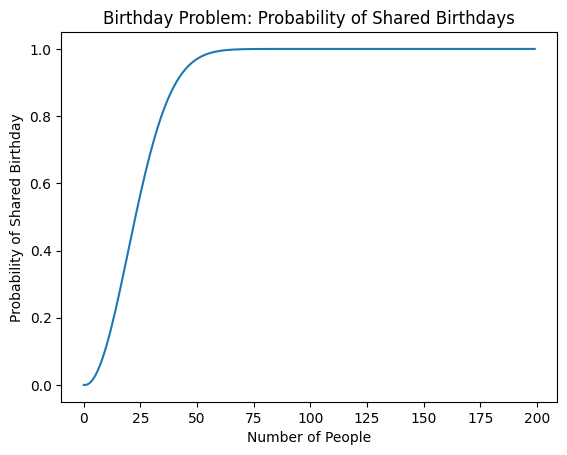

In [3]:
import numpy as np
import matplotlib.pyplot as plt

n_max = 200  # The maximum number of people to calculate the probability for

# Initialize an array to store the probability of having at least two people with the same birthday
collisions = np.zeros(n_max)

# Loop over the number of people from 0 to n_max
for n in range(0, n_max):
    days = 365  # The number of unique birthdays, assuming birthdays are uniformly distributed
    p_temp = 1   # Initialize a temporary variable to store the probability of no collisions

    # Calculate the probability of no collisions for 'n' people
    for i in range(0, n):
        p_temp = p_temp * (days - i) / days

    # Calculate the probability of at least one collision by subtracting the no-collision probability from 1
    p = 1 - p_temp

    # Store the calculated probability in the 'collisions' array
    collisions[n] = p

# Plot the probabilities of collisions for each number of people
plt.plot(list(range(0, n_max)), collisions)
plt.xlabel('Number of People')
plt.ylabel('Probability of Shared Birthday')
plt.title('Birthday Problem: Probability of Shared Birthdays')
plt.show()


The following code calculates the binomial distribution for the number of successful outcomes in a fixed number of independent Bernoulli trials, where the probability of success is 1/365. The code then plots the cumulative distribution function (CDF) and the probability distribution function (PDF) of the binomial distribution.

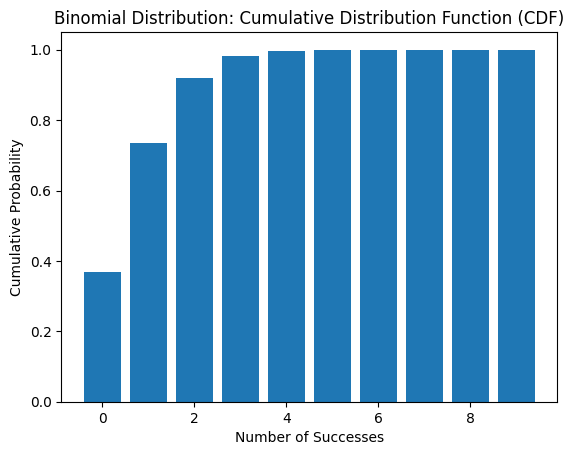

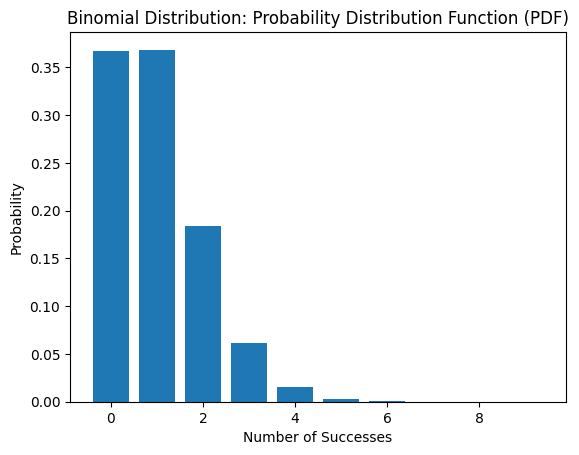

In [4]:
import math
import matplotlib.pyplot as plt

n_trials = 365  # The total number of trials
p = 1./365.      # The probability of success in each trial

pdf = []  # Initialize an empty list to store the probability distribution function
cdf = []  # Initialize an empty list to store the cumulative distribution function
cumulative = 0  # Initialize a variable to accumulate the probability

# Calculate the binomial probability and cumulative probability for k successes in n_trials
for k in range(0, 10):
    # Calculate the binomial coefficient (n choose k) using factorials
    nCk = (math.factorial(n_trials) / (math.factorial(k) * math.factorial(n_trials - k)))

    # Calculate the binomial probability for k successes
    f = nCk * (p**k) * ((1 - p)**(n_trials - k))

    pdf += [f]  # Append the calculated probability to the PDF list
    cumulative += f  # Add the calculated probability to the cumulative sum
    cdf += [cumulative]  # Append the cumulative probability to the CDF list

# Plot the cumulative distribution function (CDF)
plt.bar(range(0, 10), cdf)
plt.xlabel('Number of Successes')
plt.ylabel('Cumulative Probability')
plt.title('Binomial Distribution: Cumulative Distribution Function (CDF)')
plt.show()

# Plot the probability distribution function (PDF)
plt.bar(range(0, 10), pdf)
plt.xlabel('Number of Successes')
plt.ylabel('Probability')
plt.title('Binomial Distribution: Probability Distribution Function (PDF)')
plt.show()


# UMI Expected number of collisions for different sampling sizes

The following code calculates the expected number of collisions for different UMI lengths (10 to 40) and different sample sizes (100,000, 1,000,000, 10,000,000, and 100,000,000). The expected number of collisions is plotted on a log scale as a function of UMI length, illustrating the relationship between UMI length and the number of collisions in the samples.

In this context, a "collision" refers to the situation where two or more Unique Molecular Identifiers (UMIs) have the same sequence. 




<ipython-input-10-bc7da77dc8d1>:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = plt.cm.get_cmap("viridis", len(sample_sizes))


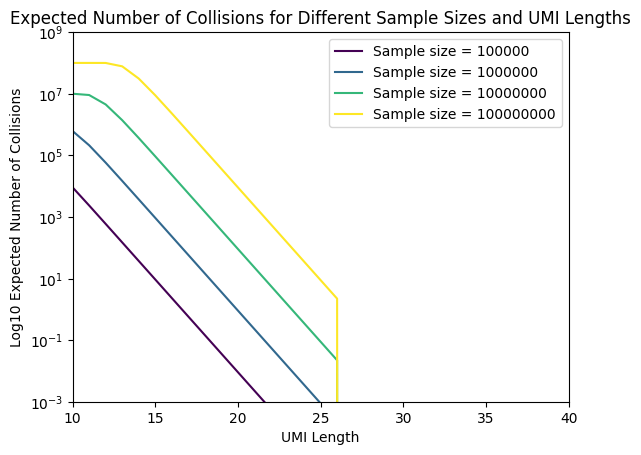

In [10]:
import matplotlib.pyplot as plt

# Define the different sample sizes (number of UMIs)
sample_sizes = [100000, 1000000, 10000000, 100000000]

# Define a colormap for visual distinction between different sample sizes
colormap = plt.cm.get_cmap("viridis", len(sample_sizes))

# Loop through the different sample sizes
for idx, sample_size in enumerate(sample_sizes):
    expected_number_of_collisions = []  # Initialize the list to store expected number of collisions
    UMI_lengths = list(range(10, 41))   # Define the range of UMI lengths to consider

    # Calculate the expected number of collisions for each UMI length
    for umi_length in UMI_lengths:
        num_permutations = 4.0**umi_length  # Calculate the number of possible permutations for a UMI of length i (4 bases)
        # Calculate the expected number of collisions using the formula and append it to the list
        expected_number_of_collisions += [sample_size * (1 - (((num_permutations - 1)) / num_permutations) ** (sample_size - 1))]

    # Plot the expected number of collisions as a function of UMI length with a unique color from the colormap
    plt.plot(UMI_lengths, expected_number_of_collisions, color=colormap(idx / (len(sample_sizes) - 1)), label=f"Sample size = {sample_size}")

# Set the y-axis scale to log
plt.yscale('log')
# Set the y-axis limits
plt.ylim(.001, 1000000000)
# Set the y-axis label
plt.ylabel("Log10 Expected Number of Collisions")
# Set the x-axis label
plt.xlabel("UMI Length")
# Set the x-axis limits
plt.xlim(10, 40)
# Add a legend to the plot
plt.legend()
# Add a title to the plot
plt.title("Expected Number of Collisions for Different Sample Sizes and UMI Lengths")
# Display the plot
plt.show()


# Probability that two sequences are hamming distance d apart

This code calculates the probability that two sequences of a given UMI length have a specific Hamming distance 'd'. The Hamming distance between two strings of equal length is the number of positions at which the corresponding symbols are different. In this code, the probability of a match at any position is 3/4 (p), and the probability of a mismatch is 1/4 (1-p). The code then plots the probability of two sequences having Hamming distance 'd' for different UMI lengths.

<ipython-input-7-ae6198f9b4ee>:19: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = plt.cm.get_cmap("viridis", 24)


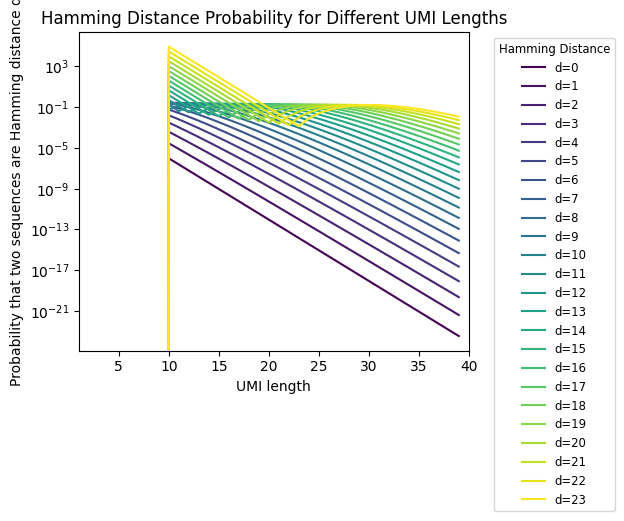

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import math
import functools

@functools.lru_cache(maxsize=None)
def ncr(n, r):
    r = min(r, n-r)
    numer = math.prod(range(n, n-r, -1))
    denom = math.prod(range(1, r+1))
    return numer // denom

plt.close()
max_umi_length = 40
min_umi_length = 10
match_probability = 3/4

# Define a colormap for visual distinction between different Hamming distances
colormap = plt.cm.get_cmap("viridis", 24)

# Loop through different Hamming distances (0 to 23)
for hamming_distance in range(0, 24):
    prob = np.zeros(max_umi_length)

    # Calculate the probability for each UMI length
    for umi_length in range(min_umi_length, max_umi_length+ 1):
        p_hamming_distance_is_d = (match_probability ** hamming_distance) * ((1 - match_probability) ** (umi_length - hamming_distance)) * ncr(umi_length, hamming_distance)
        prob[umi_length] = p_hamming_distance_is_d

    # Plot the probabilities for the current Hamming distance with a unique color from the colormap
    plt.plot(list(range(0, max_umi_length)), prob, color=colormap(hamming_distance / 23), label=f"d={hamming_distance}")

# Set the y-axis scale to log
plt.yscale('log')
# Set the y-axis label
plt.ylabel("Probability that two sequences are Hamming distance d")
# Set the x-axis label
plt.xlabel("UMI length")
# Set the x-axis limits
plt.xlim(1, 40)
# Add a legend to the plot
plt.legend(title="Hamming Distance", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small', title_fontsize='small')
# Add a title to the plot
plt.title("Hamming Distance Probability for Different UMI Lengths")
# Adjust the plot layout to accommodate the legend
plt.tight_layout()
# Display the plot
plt.show()


# Expected number of collisions defined as being within a certain Hamming distance

This code calculates the expected number of collisions between sequences for different UMI lengths, considering an upper Hamming distance d_max (in this case, 3) above which it is to be considered unique. It then plots the expected number of collisions on a log scale as a function of UMI length.



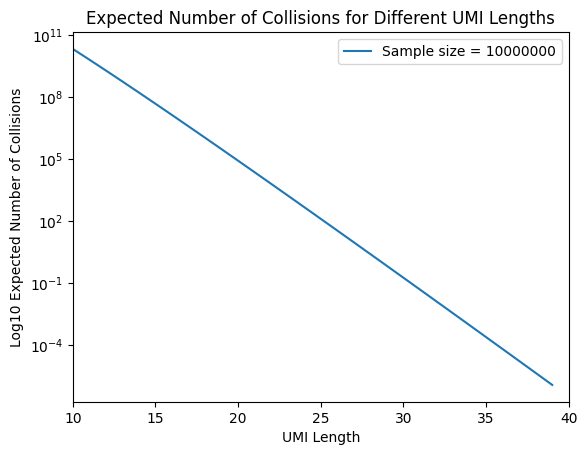

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import math
import functools

@functools.lru_cache(maxsize=None)
def ncr(n, r):
    r = min(r, n-r)
    numer = math.prod(range(n, n-r, -1))
    denom = math.prod(range(1, r+1))
    return numer // denom

d_max = 3  # Hamming distance above which two sequences are to be considered distinct
set_of_k = [10000000]  # Different sample sizes (number of UMIs) to consider

# Loop through the different sample sizes
for k in set_of_k:
    UMI_lengths = list(range(10, 40))  # Define the range of UMI lengths to consider
    expected_number_of_collisions = []  # Initialize the list to store the expected number of collisions

    # Calculate the expected number of collisions for each UMI length
    for nt in UMI_lengths:
        sum_collisions = 0
        # Calculate the sum of collisions for each Hamming distance up to d_max
        for d in range(0, d_max):
            sum_collisions += ((k * (k - 1)) / 2) * ((.75) ** d) * ((.25) ** (nt - d)) * ncr(nt, d)
        expected_number_of_collisions += [sum_collisions]

    # Plot the expected number of collisions as a function of UMI length
    plt.plot(UMI_lengths, expected_number_of_collisions, label=f"Sample size = {k}")

# Set the y-axis scale to log
plt.yscale('log')
# Set the y-axis label
plt.ylabel("Log10 Expected Number of Collisions")
# Set the x-axis label
plt.xlabel("UMI Length")
# Set the x-axis limits
plt.xlim(10, 40)
# Add a legend to the plot
plt.legend()
# Add a title to the plot
plt.title("Expected Number of Collisions for Different UMI Lengths")
# Display the plot
plt.show()


# Distribution of Hamming distances for a barcode of fixed length

This code calculates the expected number of collisions for a fixed UMI length (24 nt) considering different Hamming distances (from 0 up to the UMI length) as the maximum acceptable Hamming distance to be considered unique. It then plots the expected number of collisions on a log scale as a function of Hamming distance.



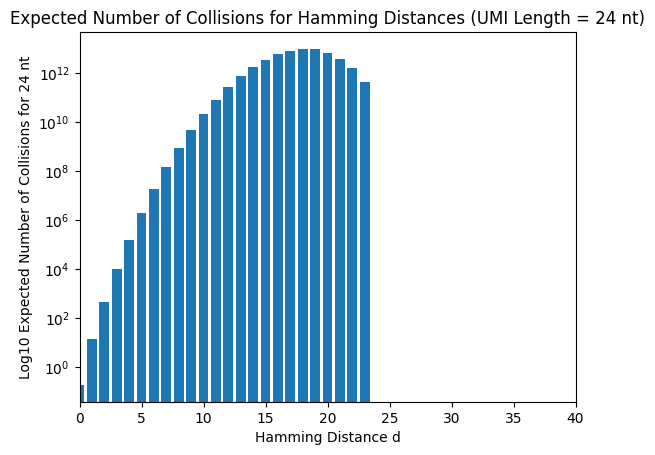

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import math
import functools

@functools.lru_cache(maxsize=None)
def ncr(n, r):
    r = min(r, n-r)
    numer = math.prod(range(n, n-r, -1))
    denom = math.prod(range(1, r+1))
    return numer // denom

umi_length = 24
d_max = umi_length  # Maximum acceptable Hamming distance to be considered unique
set_of_k = [10000000]  # Different sample sizes (number of UMIs) to consider

# Loop through the different sample sizes
for k in set_of_k:
    expected_number_of_collisions = []  # Initialize the list to store expected number of collisions

    # Calculate the expected number of collisions for each Hamming distance up to d_max
    for d in range(0, d_max):
        sum_collisions = 0
        sum_collisions += ((k * (k - 1)) / 2) * ((.75) ** d) * ((.25) ** (umi_length - d)) * ncr(umi_length, d)
        expected_number_of_collisions += [sum_collisions]

    # Plot the expected number of collisions as a function of Hamming distance
    plt.bar(range(0, umi_length), expected_number_of_collisions)

# Set the y-axis scale to log
plt.yscale('log')
# Set the y-axis label
plt.ylabel("Log10 Expected Number of Collisions for 24 nt")
# Set the x-axis label
plt.xlabel("Hamming Distance d")
# Set the x-axis limits
plt.xlim(0, 40)
# Add a title to the plot
plt.title("Expected Number of Collisions for Hamming Distances (UMI Length = 24 nt)")
# Display the plot
plt.show()


# Minimum barcode length for given number of collisions

Computes the minimum UMI length required to meet a user-specified minimum expected number of collisions and user-defined definition of collision in terms of Hamming distance

In [17]:
import math
import functools


@functools.lru_cache(maxsize=None)
def ncr(n, r):
    r = min(r, n - r)
    numer = math.prod(range(n, n - r, -1))
    denom = math.prod(range(1, r + 1))
    return numer // denom

# Function to calculate the expected number of collisions for a given UMI length, sample size, and maximum Hamming distance
def expected_collisions(umi_length, sample_size, max_hamming_distance):
    collisions = 0
    for d in range(0, max_hamming_distance):
        collisions += ((sample_size * (sample_size - 1)) / 2) * ((0.75) ** d) * ((0.25) ** (umi_length - d)) * ncr(umi_length, d)
    return collisions

# Function to compute the minimum UMI length required to meet the user-specified minimum expected number of collisions
# and user-defined definition of collision in terms of Hamming distance
def minimum_umi_length(sample_size, max_hamming_distance, min_expected_collisions, umi_length_min=10, umi_length_max=40):
    min_umi_length = umi_length_max
    for umi_length in range(umi_length_min, umi_length_max + 1):
        collisions = expected_collisions(umi_length, sample_size, max_hamming_distance)
        # If the expected number of collisions is less than or equal to the minimum expected number of collisions,
        # update the minimum UMI length
        if collisions <= min_expected_collisions:
            min_umi_length = umi_length
            break
    return min_umi_length

# Example usage:
sample_size = 500000000
max_hamming_distance = 3
min_expected_collisions = 1

# Calculate the minimum UMI length required to meet the specified criteria
min_umi_length = minimum_umi_length(sample_size, max_hamming_distance, min_expected_collisions)
print(f"Minimum UMI length: {min_umi_length}")


Minimum UMI length: 35
